# Matthews Correlation Coefficient (MCC)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    matthews_corrcoef, confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, f1_score
)
import pandas as pd

# Configuración general
np.random.seed(42)
plt.style.use('default')
sns.set_palette("husl")

print("=== ANÁLISIS DEL COEFICIENTE DE CORRELACIÓN DE MATTHEWS (MCC) ===\n")


=== ANÁLISIS DEL COEFICIENTE DE CORRELACIÓN DE MATTHEWS (MCC) ===



In [6]:
# 1. CREAR DATASET DESBALANCEADO (SIMULACIÓN DE DETECCIÓN DE FRAUDE)
X, y = make_classification(
    n_samples=10000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=2,
    weights=[0.95, 0.05],  # 95% clase 0 (No Fraude), 5% clase 1 (Fraude)
    flip_y=0.01,
    random_state=42
)

print("=== DISTRIBUCIÓN DE CLASES ===")
print(f"Clase 0 (No Fraude): {sum(y == 0)} ({sum(y == 0)/len(y)*100:.1f}%)")
print(f"Clase 1 (Fraude):    {sum(y == 1)} ({sum(y == 1)/len(y)*100:.1f}%)")


=== DISTRIBUCIÓN DE CLASES ===
Clase 0 (No Fraude): 9461 (94.6%)
Clase 1 (Fraude):    539 (5.4%)


In [8]:
# 2. DIVISIÓN TRAIN/TEST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. MODELOS A COMPARAR
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}


In [10]:
# ENTRENAR MODELOS Y CALCULAR MÉTRICAS
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcular métricas principales
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = {
        'MCC': mcc,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'y_pred': y_pred
    }
    
    print(f"\n{name}:")
    print(f"MCC: {mcc:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")



Random Forest:
MCC: 0.5165
Accuracy: 0.9610
Precision: 1.0000
Recall: 0.2778
F1-Score: 0.4348

Logistic Regression:
MCC: 0.5334
Accuracy: 0.9620
Precision: 0.9444
Recall: 0.3148
F1-Score: 0.4722


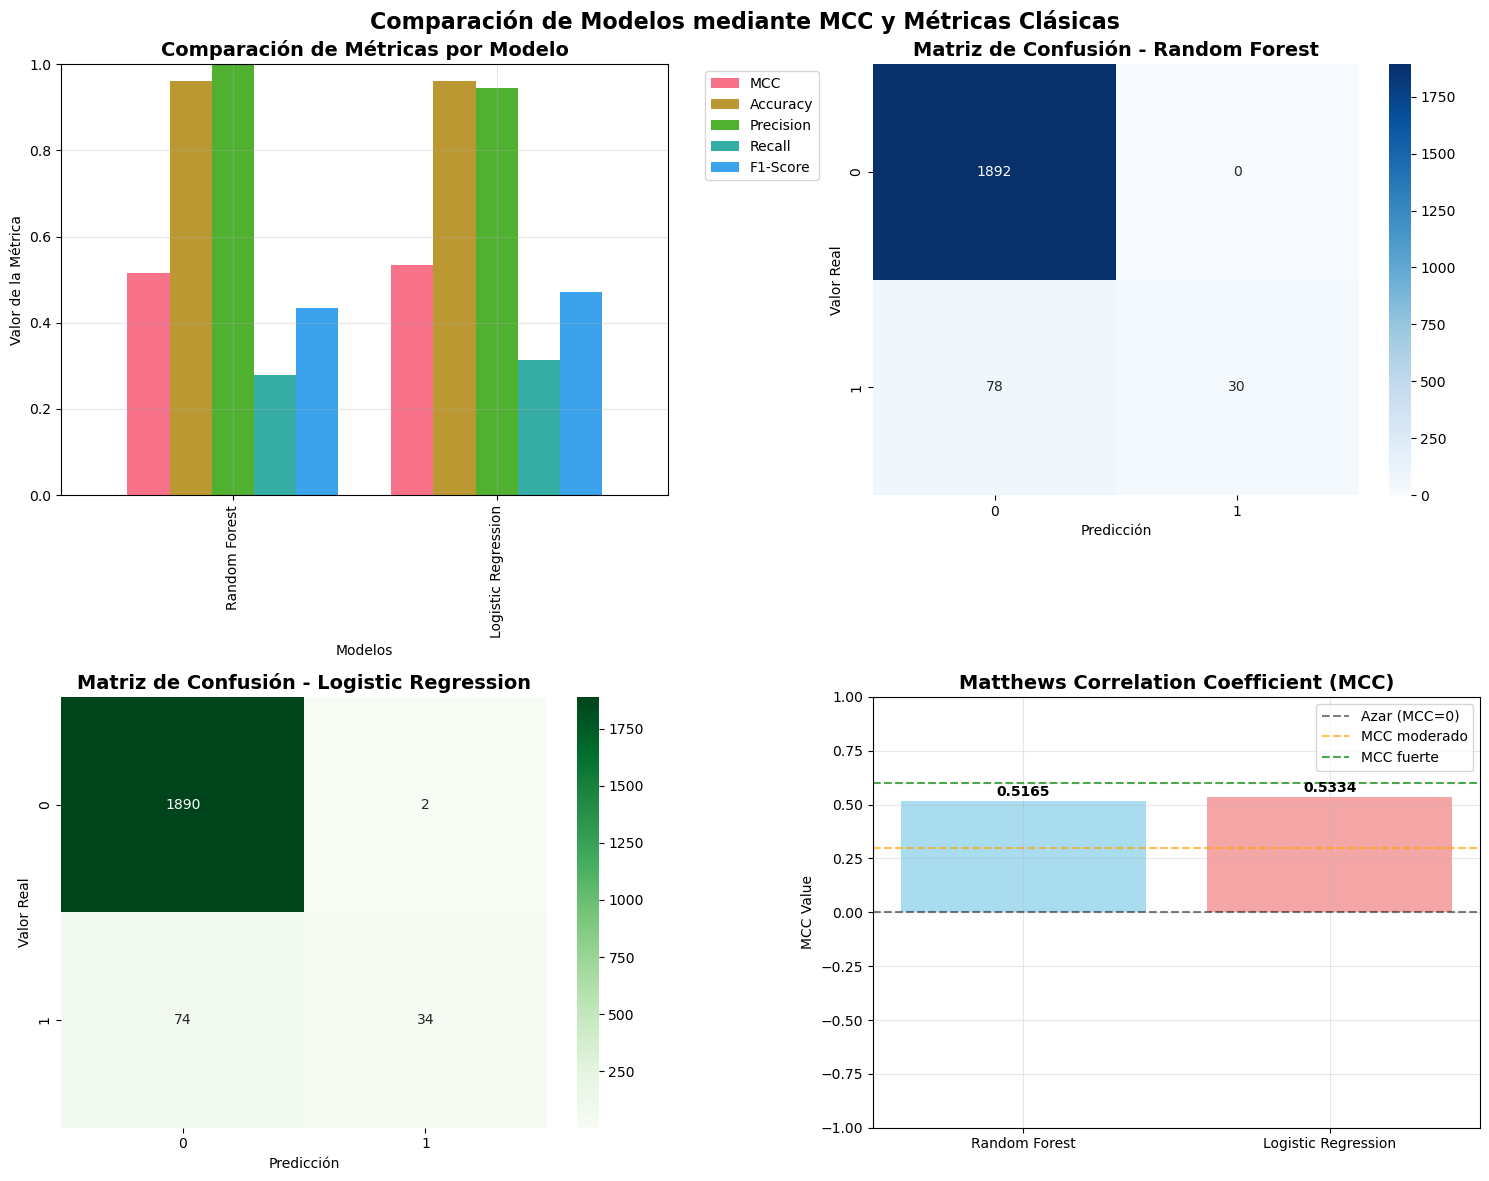

In [12]:
# 4. VISUALIZACIONES COMPARATIVAS
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comparación de Modelos mediante MCC y Métricas Clásicas', fontsize=16, fontweight='bold')

# (1) Comparación de métricas globales
metrics_df = pd.DataFrame(results).T
ax1 = axes[0, 0]
metrics_df[['MCC', 'Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title('Comparación de Métricas por Modelo', fontsize=14, fontweight='bold')
ax1.set_ylabel('Valor de la Métrica')
ax1.set_xlabel('Modelos')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 1)

# (2) Matriz de confusión — Random Forest
cm_rf = confusion_matrix(y_test, results['Random Forest']['y_pred'])
ax2 = axes[0, 1]
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Matriz de Confusión - Random Forest', fontsize=14, fontweight='bold')
ax2.set_xlabel('Predicción')
ax2.set_ylabel('Valor Real')

# (3) Matriz de confusión — Logistic Regression
cm_lr = confusion_matrix(y_test, results['Logistic Regression']['y_pred'])
ax3 = axes[1, 0]
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', ax=ax3)
ax3.set_title('Matriz de Confusión - Logistic Regression', fontsize=14, fontweight='bold')
ax3.set_xlabel('Predicción')
ax3.set_ylabel('Valor Real')

# (4) Interpretación del MCC
ax4 = axes[1, 1]
mcc_values = [results[m]['MCC'] for m in results.keys()]
colors = ['skyblue', 'lightcoral']
bars = ax4.bar(results.keys(), mcc_values, color=colors, alpha=0.7)
ax4.set_title('Matthews Correlation Coefficient (MCC)', fontsize=14, fontweight='bold')
ax4.set_ylabel('MCC Value')
ax4.set_ylim(-1, 1)
ax4.axhline(0, color='black', linestyle='--', alpha=0.5, label='Azar (MCC=0)')
ax4.axhline(0.3, color='orange', linestyle='--', alpha=0.7, label='MCC moderado')
ax4.axhline(0.6, color='green', linestyle='--', alpha=0.7, label='MCC fuerte')

# Agregar valores sobre las barras
for bar, value in zip(bars, mcc_values):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{value:.4f}', 
             ha='center', va='bottom', fontweight='bold')

ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [14]:
# 5. ANÁLISIS DETALLADO DEL MCC
print("\n" + "="*60)
print("ANÁLISIS DETALLADO DEL MCC")
print("="*60)

for name, res in results.items():
    y_pred = res['y_pred']
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\n{name}:")
    print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")
    
    # Cálculo manual de MCC
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    mcc_manual = numerator / denominator if denominator != 0 else 0
    
    print(f"MCC manual: {mcc_manual:.4f}")
    print(f"MCC sklearn: {res['MCC']:.4f}")
    print(f"Diferencia: {abs(mcc_manual - res['MCC']):.6f}")



ANÁLISIS DETALLADO DEL MCC

Random Forest:
TP: 30, TN: 1892, FP: 0, FN: 78
MCC manual: 0.5165
MCC sklearn: 0.5165
Diferencia: 0.000000

Logistic Regression:
TP: 34, TN: 1890, FP: 2, FN: 74
MCC manual: 0.5334
MCC sklearn: 0.5334
Diferencia: 0.000000


In [16]:
# 6. COMPARACIÓN CON CLASIFICADOR DUMMY (BASELINE)
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_classifier.fit(X_train, y_train)
y_pred_dummy = dummy_classifier.predict(X_test)

mcc_dummy = matthews_corrcoef(y_test, y_pred_dummy)
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)

print("\n" + "="*40)
print("COMPARACIÓN CON CLASIFICADOR DUMMY")
print("="*40)
print("Dummy Classifier (estrategia: most_frequent):")
print(f"MCC: {mcc_dummy:.4f}")
print(f"Accuracy: {accuracy_dummy:.4f}")
print(f"\nObservación: El dummy classifier tiene alta Accuracy ({accuracy_dummy:.1%}),")
print("pero MCC ≈ 0, lo que confirma que no tiene capacidad predictiva real.")



COMPARACIÓN CON CLASIFICADOR DUMMY
Dummy Classifier (estrategia: most_frequent):
MCC: 0.0000
Accuracy: 0.9460

Observación: El dummy classifier tiene alta Accuracy (94.6%),
pero MCC ≈ 0, lo que confirma que no tiene capacidad predictiva real.
